# 示例1：个体疾病状况

假设你现在是医院医生，要估计某种疾病的患病率。我们从一个样本开始，我们没有先验信息。让这个人（样本）的疾病状态用$X$来表示 

$ X=
\begin{cases}
0, & \text{没生病}\\
1, & \text{生病了}
\end{cases}
$


$\theta$代表一个随机选择的个体患有这种疾病的概率。我们现在计算一个样本每一个可能结果的概率

$P(X=0|\theta)=(1-\theta)$

$P(X=1|\theta)=(\theta)$

我们可以根据上面的公式，基于1或是0（生病还是没生病）写下一个表达式：

$
P(X=a|\theta)=\theta^a(1-\theta)^{1-a} \qquad where \quad a\in \left\{0， 1\right\}
$

我们可以使用python代码来实现上面的例子。首先先加载numpy库。

之后我们定义一个函数，n就是样本量，在我们例子中为1；a是我们样本生病还是没生病的情况；最后是\theta$，我们随机选中一个个体生病的概率。

In [1]:
import numpy as np

In [2]:
def likelihood(n,a, theta):##def开始定义函数，紧接着是函数名，括号内部为函数的参数
    like_fun = (theta**a*(1-theta)**(n-a))
    return like_fun

如果得这种病的概率是0.5，我们可以计算一下假设这里我们一个样本生病了的概率

In [3]:
likelihood(1, 1, 0.5)

0.5

我们也可以使用不同的$\theta$

In [4]:
theta1 = np.arange(0, 1.2, 0.2)# 使用numpy生成一个数组，0为开始，1.2为结束（不包括1.2），0.2为步长生成6个theta

In [5]:
theta1

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [6]:
likelihood(1, 1, theta1)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [7]:
likelihood(1, 0, theta1)

array([1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [8]:
import matplotlib.pyplot as plt

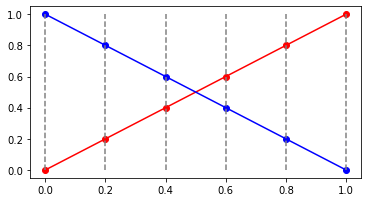

In [9]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
plt.scatter(x=theta1, y = likelihood(1, 1, theta1), c = "red")######生病
plt.scatter(x=theta1, y = likelihood(1, 0, theta1), c = "blue")####不生病
plt.plot(theta1, likelihood(1, 1, theta1),c = "red")######生病
plt.plot(theta1, likelihood(1, 0, theta1),c = "blue")####不生病
plt.vlines(theta1,0,1, linestyles="dashed", color = "grey")####增加垂直线，注意，在同一个theta下，生病和不生病的概率相加始终为1

# 示例2:一组被试的智力测试分数

假设我们对一组被试进行智力测试，测试分数的范围是0-200。假设我们没有关于个体特征的信息来帮助预测，同时一个人的智力测试分数可能会有多个因素影响，我们假设一个人的分数是所有这些因素的平均值，那么中心极限定理可能适用，我们可以使用正态分布来模拟测试分数X：

$p(X=a|\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(a-\mu)^2}{2\sigma^2}}$

现在考虑一个由N个个体组成的样本。如果我们假设一个人的考试成绩无助于预测另一个人的成绩，那么我们的数据就是独立的。如果我们还假设所有的个体都来自同一个群体，我们就有一个随机样本。然后，我们可以通过取个体概率密度的乘积来计算N个个体样本的联合概率密度：

$p(X_1=a_1, X_2=a_2, ..., X_N=a_N|\mu, \sigma)=\prod\limits_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(a-\mu)^2}{2\sigma^2}}$

In [10]:

def pdf(a, mu, sigma):
    fx = np.exp(-(a-mu)**2/(2*sigma**2))*1/np.sqrt(2*np.pi*sigma**2)
    return fx

In [11]:
a_n = np.arange(60, 180, 20)

In [12]:
a_n

array([ 60,  80, 100, 120, 140, 160])

In [13]:
pdf(a_n, 80, 100)##在pdf函数中，mu是总体均值，100是总体标准差，a是个体的智力测验分数

array([0.00391043, 0.00398942, 0.00391043, 0.0036827 , 0.00333225,
       0.00289692])

In [14]:
a_pdf = pdf(a_n, 80, 100)

In [15]:
np.prod(a_pdf)###np.prod是连乘函数

2.1686916940290963e-15